In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Deck: #class representing 3 deck of cards
    def __init__(self):
        self.J, self.Q, self.K, self.A = 10, 10, 10, 11
        self.cards = [2, 3, 4, 5, 6, 7, 8, 9, 10, self.J, self.Q, self.K, self.A] * 4 * 5
        self.shuffle()
        
    def shuffle(self):
        np.random.shuffle(self.cards)
        
    def reset(self): #cards for new game
        self.cards = [2, 3, 4, 5, 6, 7, 8, 9, 10, self.J, self.Q, self.K, self.A] * 4 * 5
        self.shuffle()
    
    def hit(self):
        return self.cards.pop()

In [3]:
class BlackJack: #class implementing actual blackjack game and rules
    
    def __init__(self): #argument is instance of class that is being played
        self.deck = Deck()
        
        # Initializing manual player.
        self.manualPlayer = Player()
        self.manualPlayer.player_name = "Manual"
        
        #Initializing random player.
        self.randomPlayer = RandomPlayer()
        self.randomPlayer.player_name = "Random"
        self.randomMoney = []
        
        #Initializing statical player.
        self.staticalPlayer = StaticPlayer()
        self.staticalPlayer.player_name = "Statical"
        self.staticalMoney = []
        
        #Initializing ml player.
        self.machinePlayer = MachinePlayer()
        self.machinePlayer.player_name = "ML"
        self.machineMoney = []
        
        self.dealer = Dealer()
        self.dealer.player_name = "Dealer"
        self.dealerMoney = []
        
    def play(self): 
        for i in range(10000): #plays 10.000 games
            self.randomMoney.append(self.randomPlayer.player_money)
            self.staticalMoney.append(self.staticalPlayer.player_money)
            self.machineMoney.append(self.machinePlayer.player_money)
            self.dealerMoney.append(self.dealer.player_money)
            
            print("ROUND " + str(i+1) + "!")
            self.dealer_draw() # dealer draws first
            #self.turn(self.manualPlayer)
            self.turn(self.randomPlayer)
            self.turn(self.machinePlayer)
            if (len(self.staticalPlayer.totalCardMasked)<=len(self.staticalPlayer.totalCards)*0.4):
                staticalPlayerPlayed = True
                self.staticalPlayer.times_played = self.staticalPlayer.times_played + 1
                self.turn(self.staticalPlayer)
            else:
                staticalPlayerPlayed = False
            # PLAY ALL PLAYERS
            self.turn(self.dealer)
            
            #--------------------------------------------------------------------MANUAL PLAYER EVAL
            '''
            winner = self.eval_winner(self.manualPlayer)
            if winner == "dealer": #update the averages to keep track of data
                self.manualPlayer.update(-2)
                self.dealer.update(2)
                print("Manual Player lost 2$ and total money updated to: " + str(self.manualPlayer.player_money))
            elif winner == "Manual" and self.manualPlayer.hand_value() == 21 and len(self.manualPlayer.cards) == 2:
                print("Manual Player win 3$ and total money updated to: " + str(self.manualPlayer.player_money))
            elif winner == "Manual":
                self.manualPlayer.update(2)
                self.dealer.update(-2)
                print("Manual Player win 2$ and total money updated to: " + str(self.manualPlayer.player_money))
            '''
            
            #---------------------------------------------------------------------RANDOM PLAYER EVAL
            winner = self.eval_winner(self.randomPlayer)
            if winner == "dealer": #update the averages to keep track of data
                self.randomPlayer.update(-2)
                self.dealer.update(2)
            elif winner == "Random" and self.randomPlayer.hand_value() == 21 and len(self.randomPlayer.cards) == 2:
                pass
            elif winner == "Random":
                self.randomPlayer.update(2)
                self.dealer.update(-2)
           #-----------------------------------------------------------------------MACHINE PLAYER EVAL
            winner = self.eval_winner(self.machinePlayer)
            if winner == "dealer": #update the averages to keep track of data
                self.machinePlayer.update(-2)
                self.dealer.update(2)
            elif winner == "ML" and self.machinePlayer.hand_value() == 21 and len(self.machinePlayer.cards) == 2:
                pass
            elif winner == "ML":
                self.machinePlayer.update(2)
                self.dealer.update(-2)
           #-----------------------------------------------------------------------STATICAL PLAYER EVAL     
            if (staticalPlayerPlayed):
                winner = self.eval_winner(self.staticalPlayer)

                if winner == "dealer": #update the averages to keep track of data
                    self.staticalPlayer.update(-2)
                    self.dealer.update(2)
                elif winner == "Statical" and self.staticalPlayer.hand_value() == 21 and len(self.staticalPlayer.cards) == 2:
                    pass
                elif winner == "Statical":
                    self.staticalPlayer.update(2)
                    self.dealer.update(-2)
            #--------------------------------------------------------------------------------------
              
            
            if (len(self.deck.cards)<=30):
                self.deck.reset()
                self.staticalPlayer.readReset()
            # Reset all players
            self.manualPlayer.reset()
            self.randomPlayer.reset()
            self.machinePlayer.reset()
            self.staticalPlayer.reset()
            # Reset the dealer
            self.dealer.reset()
            print("--------------------------------")
           
            

    def dealer_draw(self): #dealer draws first
        card = self.deck.hit()
        self.staticalPlayer.readCard(card)
        print("Dealer received " + str(card))
        self.dealer.receive_card(card) #give dealer his card
        self.manualPlayer.receive_dealers_card(card) #let player know what card the dealer got
        self.machinePlayer.receive_dealers_card(card)    
        self.staticalPlayer.receive_dealers_card(card)
        #if printer: print("dealer received card with value of ", card)
        
    def turn(self, player): #function representing 1 players turn
        playerMove = "hit"
        while playerMove == "hit":#give the player their card as long as they keep asking for it
            card = self.deck.hit()
            self.staticalPlayer.readCard(card)
            player.receive_card(card)
            print(player.player_name + " received " + str(card))
            val = player.hand_value()
            print(player.player_name + "'s hand value is " + str(val))
            # if the player busts or gets blackjack, their turn is done
            if val == -1:
                print(player.player_name + " busted.")        
                break
            elif val == 21 and len(player.cards) == 2:
                if(player.player_name is not "Dealer"):
                    print("CONGRATS "+ player.player_name +" !! BlackJack")
                    # Pay the money 1.5x
                    player.update(3)
                    self.dealer.update(-3)
                break
            elif val == 21 and len(player.cards) != 2:
                print("NICE !")
                break
            else: 
                playerMove = player.get_move()
                
    def eval_winner(self, player): # function to decide which player won
        playerVal = player.hand_value()
        dealerVal = self.dealer.hand_value()
        
        if playerVal == -1 or dealerVal > playerVal: #the dealer wins if the player busts
            return "dealer"
        elif playerVal >= dealerVal:
            # print("player won!")
            return player.player_name
        else:
            # print("tie")
            return "tie"

<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-3-dcd18cefd03f>:138: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(player.player_name is not "Dealer"):


In [4]:
class Player: #this is a base class for the player, allows user to type hit or stand and actually play blackjack
    def __init__(self):
        self.cards = []
        self.player_money = 10000
        
    def reset(self):
        self.cards = [] #player starts with no cards
        self.dealer_card = 0
        
    def update(self,bet): #used for money transaction
        self.player_money = self.player_money + bet
        
    def receive_dealers_card(self, card):#keep track of the dealers card
        self.dealer_card = card
    
    def get_move(self): #function that game calls to get if player is standing or hitting again
        #hit or stop
        if self.hand_value() <= 11:
            return "hit"
        inp = ""
        while inp != "hit" and inp != "stand":
            print("Enter hit or stand: ")
            inp = input()
        return inp
    
    def receive_card(self, card): # after hitting, i add the card to my hand
        self.cards.append(card)
    
    def hand_value(self): # returns best hand value (Aces make things hard)
        # returns hard values when available ie the max possible hand value that isnt above 21
        if len(self.cards) == 0: #if i dont have any cards i dont have any value
            return 0
        value = [] # value is an array of values of the current hand
        for card in self.cards:
            if card != 11:
                if len(value) != 0:
                    for _ in range(len(value)):
                        value[_] += card
                else:
                    value = [card]
            else:
                if len(value) != 0:
                    newValue = []
                    for _ in value:
                        newValue.append(_ + 1)
                        newValue.append(_ + 11)
                    value = newValue
                else:
                    value = [1, 11]
        value = [val for val in value if val <= 21]
        if 21 in value: #if i have a blackjack i for sure want to have that be my value
            return 21
        elif len(value) == 0: #if i busted, value array wont have any possible values
            return -1
        else:
            return max(value)


In [5]:
class Dealer(Player):
        
    def get_move(self): #dealer hits if < 17
        hand = self.hand_value()
        if hand < 17:
            return "hit"
        elif hand >= 17:
            return "stand"

In [6]:
class RandomPlayer(Player): #player that randomly hits or stands (used for baseline stats)
   
    def get_move(self):
        if self.hand_value() <= 11:
            return "hit"
        return np.random.choice(["hit", "stand"])

In [7]:
class StaticPlayer(Player):
    def __init__(self):
        self.totalCards = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11] * 4 * 5
        self.totalCardMasked = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11] * 4 * 5
        self.cards = []
        self.player_money = 10000
        self.times_played = 0
    
    def get_move(self):
        hand = self.hand_value()
        needed = 21 - hand
        card_left = len(self.totalCardMasked)
        avaiable_cards = 0
        for left in self.totalCardMasked:
            if (left <= needed):
                avaiable_cards = avaiable_cards + 1
        if (avaiable_cards >= card_left * 0.75) or hand <= 11:
            return "hit"
        return "stand"
    
    def readCard(self, card):
        self.totalCardMasked.pop(card)
    
    def readReset(self):
        self.totalCardMasked = self.totalCards.copy()

In [8]:
import pickle
filename = 'finalized_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# x = loaded_model.predict([[card1, card2, dealerCard]])
class MachinePlayer(Player):
    def get_move(self):
        if self.hand_value() <= 11:
            return "hit"
        if len(self.cards) <= 2:
            return loaded_model.predict([[self.cards[0],self.cards[1],self.dealer_card]])[0]
        else:
            self.cards[0] = self.cards[0] + self.cards[-1]
            return loaded_model.predict([[self.cards[0], self.cards[1], self.dealer_card]])[0]
        
        

C:\Users\aslis\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator LogisticRegressionCV from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [9]:
# MAIN
game = BlackJack()
game.play()

ROUND 1!
Dealer received 5
Random received 2
Random's hand value is 2
Random received 7
Random's hand value is 9
Random received 6
Random's hand value is 15
ML received 11
ML's hand value is 11
ML received 4
ML's hand value is 15
Dealer received 10
Dealer's hand value is 15
Dealer received 5
Dealer's hand value is 20
--------------------------------
ROUND 2!
Dealer received 8
Random received 4
Random's hand value is 4
Random received 7
Random's hand value is 11
Random received 3
Random's hand value is 14
Random received 6
Random's hand value is 20
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 11
Dealer's hand value is 19
--------------------------------
ROUND 3!
Dealer received 10
Random received 9
Random's hand value is 9
Random received 5
Random's hand value is 14
ML received 5
ML's hand value is 5
ML received 9
ML's hand value is 14
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 4!
Dealer received 11
Ra

ML's hand value is 4
ML received 10
ML's hand value is 14
Statical received 10
Statical's hand value is 10
Statical received 5
Statical's hand value is 15
Dealer received 11
Dealer's hand value is 21
--------------------------------
ROUND 103!
Dealer received 7
Random received 11
Random's hand value is 11
Random received 3
Random's hand value is 14
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Statical received 8
Statical's hand value is 8
Statical received 2
Statical's hand value is 10
Statical received 8
Statical's hand value is 18
Dealer received 6
Dealer's hand value is 13
Dealer received 5
Dealer's hand value is 18
--------------------------------
ROUND 104!
Dealer received 10
Random received 7
Random's hand value is 7
Random received 7
Random's hand value is 14
Random received 3
Random's hand value is 17
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Statical received 11
Statical's hand value is 11
Statical received 10
Statical

Dealer received 8
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 193!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 6
Random's hand value is 16
Random received 9
Random's hand value is -1
Random busted.
ML received 6
ML's hand value is 6
ML received 10
ML's hand value is 16
Dealer received 10
Dealer's hand value is 21
--------------------------------
ROUND 194!
Dealer received 6
Random received 5
Random's hand value is 5
Random received 4
Random's hand value is 9
Random received 10
Random's hand value is 19
Random received 10
Random's hand value is -1
Random busted.
ML received 2
ML's hand value is 2
ML received 11
ML's hand value is 13
Dealer received 10
Dealer's hand value is 16
Dealer received 5
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 195!
Dealer received 4
Random received 8
Random's hand value is 8
Random received 7
Random's hand value is 15
ML received 10
ML's hand value is 10
ML rec

Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 284!
Dealer received 3
Random received 7
Random's hand value is 7
Random received 10
Random's hand value is 17
ML received 10
ML's hand value is 10
ML received 2
ML's hand value is 12
Dealer received 2
Dealer's hand value is 5
Dealer received 10
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 285!
Dealer received 10
Random received 7
Random's hand value is 7
Random received 5
Random's hand value is 12
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 286!
Dealer received 6
Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
Random received 11
Random's hand value is 13
Random received 3
Random's hand value is 16
Random received 6
Random's hand value is -1
Random busted.
ML received 10
ML's han

ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 5
Dealer's hand value is 10
Dealer received 5
Dealer's hand value is 15
Dealer received 2
Dealer's hand value is 17
--------------------------------
ROUND 364!
Dealer received 6
Random received 9
Random's hand value is 9
Random received 8
Random's hand value is 17
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Dealer received 8
Dealer's hand value is 14
Dealer received 4
Dealer's hand value is 18
--------------------------------
ROUND 365!
Dealer received 10
Random received 11
Random's hand value is 11
Random received 10
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 10
ML's hand value is 10
ML received 2
ML's hand value is 12
ML received 3
ML's hand value is 15
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 366!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
ML receiv

--------------------------------
ROUND 457!
Dealer received 8
Random received 4
Random's hand value is 4
Random received 5
Random's hand value is 9
Random received 10
Random's hand value is 19
Random received 2
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Statical received 6
Statical's hand value is 6
Statical received 9
Statical's hand value is 15
Dealer received 9
Dealer's hand value is 17
--------------------------------
ROUND 458!
Dealer received 5
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 9
ML's hand value is 9
ML received 3
ML's hand value is 12
Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 10
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 459!
Dealer received 11
Random received 11
Random's hand value is 11
Random rec

Random's hand value is 21
NICE !
ML received 6
ML's hand value is 6
ML received 11
ML's hand value is 17
Dealer received 7
Dealer's hand value is 12
Dealer received 6
Dealer's hand value is 18
--------------------------------
ROUND 547!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 7
ML's hand value is 7
ML received 3
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 11
Dealer's hand value is 12
Dealer received 4
Dealer's hand value is 16
Dealer received 4
Dealer's hand value is 20
--------------------------------
ROUND 548!
Dealer received 2
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 6
Dealer's hand value is 8
Dealer received 11
Dealer's hand value is 19
--------------------------------
ROUND 54

Random received 10
Random's hand value is 13
Random received 3
Random's hand value is 16
Random received 11
Random's hand value is 17
Random received 5
Random's hand value is -1
Random busted.
ML received 9
ML's hand value is 9
ML received 9
ML's hand value is 18
Statical received 8
Statical's hand value is 8
Statical received 2
Statical's hand value is 10
Statical received 5
Statical's hand value is 15
Dealer received 3
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 651!
Dealer received 8
Random received 9
Random's hand value is 9
Random received 10
Random's hand value is 19
ML received 7
ML's hand value is 7
ML received 10
ML's hand value is 17
Statical received 9
Statical's hand value is 9
Statical received 10
Statical's hand value is 19
Dealer received 11
Dealer's hand value is 19
--------------------------------
ROUND 652!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 5
Random's 

Dealer received 4
Dealer's hand value is 7
Dealer received 10
Dealer's hand value is 17
--------------------------------
ROUND 725!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Dealer received 7
Dealer's hand value is 18
--------------------------------
ROUND 726!
Dealer received 11
Random received 5
Random's hand value is 5
Random received 10
Random's hand value is 15
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Statical received 7
Statical's hand value is 7
Statical received 2
Statical's hand value is 9
Statical received 8
Statical's hand value is 17
Dealer received 3
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
-------

Random received 3
Random's hand value is 15
ML received 3
ML's hand value is 3
ML received 4
ML's hand value is 7
ML received 5
ML's hand value is 12
ML received 8
ML's hand value is -1
ML busted.
Dealer received 11
Dealer's hand value is 21
--------------------------------
ROUND 808!
Dealer received 3
Random received 9
Random's hand value is 9
Random received 2
Random's hand value is 11
Random received 10
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 10
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 809!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
Random received 6
Random's hand value is -1
Random busted.
ML received 2
ML's hand value is 2
ML received 9
ML's hand value is 11
ML received 8
ML's hand value is 19
Statical received 2
Statical's hand value is 

Random busted.
ML received 9
ML's hand value is 9
ML received 7
ML's hand value is 16
Dealer received 10
Dealer's hand value is 21
--------------------------------
ROUND 911!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 9
Random's hand value is -1
Random busted.
ML received 9
ML's hand value is 9
ML received 7
ML's hand value is 16
Dealer received 2
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 912!
Dealer received 11
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 11
Dealer's hand value is 12
Dealer received 11
Dealer's hand value is 13
Dealer received 6
Dealer's hand value is 19
--------------------------------
ROUND 913!
Dealer received 10
R

ML's hand value is 7
ML received 4
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Dealer received 9
Dealer's hand value is 20
--------------------------------
ROUND 1012!
Dealer received 4
Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
Random received 2
Random's hand value is 19
Random received 10
Random's hand value is -1
Random busted.
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 11
Dealer's hand value is 15
Dealer received 3
Dealer's hand value is 18
--------------------------------
ROUND 1013!
Dealer received 10
Random received 5
Random's hand value is 5
Random received 4
Random's hand value is 9
Random received 7
Random's hand value is 16
Random received 7
Random's hand value is -1
Random busted.
ML received 2
ML's hand value is 2
ML received 3
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 5
Dealer's hand value is 15
Dealer received 6
Dealer's hand va

Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
Random received 6
Random's hand value is 18
ML received 8
ML's hand value is 8
ML received 6
ML's hand value is 14
Dealer received 10
Dealer's hand value is 13
Dealer received 7
Dealer's hand value is 20
--------------------------------
ROUND 1069!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 2
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1070!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
Random received 10
Random's hand value is -1
Random busted.
ML received 6
ML's hand value is 6
ML received 8
ML's hand value is 14
Dealer received 8
Dealer's hand value is 17
--------------------------------
ROUND 1071!
Deale

Random received 2
Random's hand value is 10
Random received 5
Random's hand value is 15
Random received 9
Random's hand value is -1
Random busted.
ML received 3
ML's hand value is 3
ML received 7
ML's hand value is 10
ML received 10
ML's hand value is 20
Statical received 10
Statical's hand value is 10
Statical received 2
Statical's hand value is 12
Dealer received 6
Dealer's hand value is 16
Dealer received 7
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1139!
Dealer received 4
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
Random received 9
Random's hand value is -1
Random busted.
ML received 7
ML's hand value is 7
ML received 10
ML's hand value is 17
Dealer received 11
Dealer's hand value is 15
Dealer received 8
Dealer's hand value is 13
Dealer received 4
Dealer's hand value is 17
--------------------------------
ROUND 1140!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 10
Ran

Statical received 2
Statical's hand value is 9
Statical received 10
Statical's hand value is 19
Dealer received 5
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is 16
Dealer received 5
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 1241!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
ML received 9
ML's hand value is 9
ML received 10
ML's hand value is 19
Statical received 11
Statical's hand value is 11
Statical received 10
Statical's hand value is 21
CONGRATS Statical !! BlackJack
Dealer received 4
Dealer's hand value is 10
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 1242!
Dealer received 2
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
Random received 6
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Statical received 10
Statical's hand va

ML received 4
ML's hand value is 6
ML received 6
ML's hand value is 12
Dealer received 10
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1346!
Dealer received 11
Random received 3
Random's hand value is 3
Random received 10
Random's hand value is 13
ML received 5
ML's hand value is 5
ML received 11
ML's hand value is 16
Dealer received 10
Dealer's hand value is 21
--------------------------------
ROUND 1347!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 8
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 2
Dealer's hand value is 8
Dealer received 4
Dealer's hand value is 12
Dealer received 3
Dealer's hand value is 15
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1348!
Dealer received 4
Random received 8
Random's hand value is 8
Random received 3
Random's hand va

Random received 7
Random's hand value is 7
Random received 10
Random's hand value is 17
Random received 5
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 9
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1423!
Dealer received 9
Random received 11
Random's hand value is 11
Random received 6
Random's hand value is 17
Random received 6
Random's hand value is 13
ML received 10
ML's hand value is 10
ML received 6
ML's hand value is 16
Dealer received 3
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1424!
Dealer received 6
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
ML received 2
ML's hand value is 2
ML received 8
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 4
Dealer's hand value is 10


Statical received 10
Statical's hand value is 10
Statical received 5
Statical's hand value is 15
Dealer received 2
Dealer's hand value is 7
Dealer received 8
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1489!
Dealer received 10
Random received 3
Random's hand value is 3
Random received 3
Random's hand value is 6
Random received 10
Random's hand value is 16
ML received 7
ML's hand value is 7
ML received 2
ML's hand value is 9
ML received 2
ML's hand value is 11
ML received 6
ML's hand value is 17
Dealer received 4
Dealer's hand value is 14
Dealer received 8
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1490!
Dealer received 8
Random received 2
Random's hand value is 2
Random received 7
Random's hand value is 9
Random received 10
Random's hand value is 19
ML received 10
ML's hand value is 10
ML received 4
ML's hand value is 14
Dealer received 10
Dealer's hand value is 18
----

Random's hand value is -1
Random busted.
ML received 9
ML's hand value is 9
ML received 10
ML's hand value is 19
Dealer received 2
Dealer's hand value is 12
Dealer received 6
Dealer's hand value is 18
--------------------------------
ROUND 1578!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 2
Dealer's hand value is 12
Dealer received 7
Dealer's hand value is 19
--------------------------------
ROUND 1579!
Dealer received 3
Random received 8
Random's hand value is 8
Random received 9
Random's hand value is 17
ML received 4
ML's hand value is 4
ML received 10
ML's hand value is 14
Dealer received 9
Dealer's hand value is 12
Dealer received 7
Dealer's hand value is 19
--------------------------------
ROUND 1580!
Dealer received 11
Random received 8
Random's hand value is 8
Random received 5
Random's hand value is 

Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 1662!
Dealer received 6
Random received 2
Random's hand value is 2
Random received 4
Random's hand value is 6
Random received 6
Random's hand value is 12
Random received 2
Random's hand value is 14
Random received 4
Random's hand value is 18
Random received 10
Random's hand value is -1
Random busted.
ML received 8
ML's hand value is 8
ML received 5
ML's hand value is 13
Dealer received 10
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1663!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 6
Random's hand value is -1
Random busted.
ML received 7
ML's hand value is 7
ML received 4
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Dealer received 2
Dealer's hand value is 12
Dealer received 3
Dealer's hand value is 15
Dealer received 5
Deal

Random received 10
Random's hand value is 20
Random received 9
Random's hand value is -1
Random busted.
ML received 7
ML's hand value is 7
ML received 10
ML's hand value is 17
Dealer received 10
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 1721!
Dealer received 4
Random received 7
Random's hand value is 7
Random received 2
Random's hand value is 9
Random received 10
Random's hand value is 19
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1722!
Dealer received 5
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 11
Random's hand value is 15
ML received 4
ML's hand value is 4
ML received 6
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 10
Dealer's hand value is 15
Dealer 

ML received 3
ML's hand value is 6
ML received 10
ML's hand value is 16
Statical received 11
Statical's hand value is 11
Statical received 5
Statical's hand value is 16
Dealer received 7
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1787!
Dealer received 4
Random received 2
Random's hand value is 2
Random received 4
Random's hand value is 6
Random received 3
Random's hand value is 9
Random received 10
Random's hand value is 19
Random received 2
Random's hand value is 21
NICE !
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Statical received 2
Statical's hand value is 2
Statical received 10
Statical's hand value is 12
Dealer received 3
Dealer's hand value is 7
Dealer received 3
Dealer's hand value is 10
Dealer received 11
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 1788!
Dealer received 8
Random received 7
Random's hand value is 7
Random received 10
Random

Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1865!
Dealer received 5
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 3
ML's hand value is 14
Statical received 5
Statical's hand value is 5
Statical received 10
Statical's hand value is 15
Dealer received 8
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 1866!
Dealer received 5
Random received 3
Random's hand value is 3
Random received 5
Random's hand value is 8
Random received 6
Random's hand value is 14
Random received 3
Random's hand value is 17
Random received 2
Random's hand value is 19
Random received 3
Random's hand value is -1
Random busted.
ML received 3
ML's hand value is 3
ML received 10
ML's hand value is 13
Statical received 7
Statical's hand value is 7
Statical receiv

Random received 10
Random's hand value is 20
Random received 9
Random's hand value is -1
Random busted.
ML received 3
ML's hand value is 3
ML received 2
ML's hand value is 5
ML received 8
ML's hand value is 13
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 1967!
Dealer received 2
Random received 5
Random's hand value is 5
Random received 8
Random's hand value is 13
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 10
Dealer's hand value is 12
Dealer received 5
Dealer's hand value is 17
--------------------------------
ROUND 1968!
Dealer received 10
Random received 7
Random's hand value is 7
Random received 4
Random's hand value is 11
Random received 10
Random's hand value is 21
NICE !
ML received 7
ML's hand value is 7
ML received 2
ML's hand value is 9
ML received 9
ML's hand value is 18
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 1969!
Dealer r

Random received 10
Random's hand value is 15
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Dealer received 6
Dealer's hand value is 10
Dealer received 7
Dealer's hand value is 17
--------------------------------
ROUND 2052!
Dealer received 4
Random received 11
Random's hand value is 11
Random received 4
Random's hand value is 15
Random received 4
Random's hand value is 19
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Dealer received 6
Dealer's hand value is 10
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 2053!
Dealer received 2
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
ML received 9
ML's hand value is 9
ML received 4
ML's hand value is 13
Dealer received 10
Dealer's hand value is 12
Dealer received 7
Dealer's hand value is 19
--------------------------------
ROUND 2054!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 2


Statical received 10
Statical's hand value is 10
Statical received 2
Statical's hand value is 12
Dealer received 11
Dealer's hand value is 13
Dealer received 11
Dealer's hand value is 14
Dealer received 3
Dealer's hand value is 17
--------------------------------
ROUND 2122!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
ML received 2
ML's hand value is 2
ML received 11
ML's hand value is 13
Dealer received 2
Dealer's hand value is 11
Dealer received 3
Dealer's hand value is 14
Dealer received 3
Dealer's hand value is 17
--------------------------------
ROUND 2123!
Dealer received 10
Random received 8
Random's hand value is 8
Random received 8
Random's hand value is 16
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 9
Dealer's hand value is 19
--------------------------------
ROUND 2124!
Dealer received 7
Random received 8
Random's hand value is 8
Random received 5
Random's hand value i

Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2210!
Dealer received 2
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 7
ML's hand value is 7
ML received 10
ML's hand value is 17
Dealer received 11
Dealer's hand value is 13
Dealer received 11
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2211!
Dealer received 7
Random received 11
Random's hand value is 11
Random received 11
Random's hand value is 12
ML received 11
ML's hand value is 11
ML received 2
ML's hand value is 13
Dealer received 5
Dealer's hand value is 12
Dealer received 2
Dealer's hand value is 14
Dealer received 3
Dealer's hand value is 17
--------------------------------
ROUND 2212!
Dealer received 10
Random received 9
Random's hand value is 9
Random received 10
Random's hand value is 19
Random rec

Random received 5
Random's hand value is 5
Random received 10
Random's hand value is 15
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 5
Dealer's hand value is 15
Dealer received 4
Dealer's hand value is 19
--------------------------------
ROUND 2303!
Dealer received 2
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
ML received 3
ML's hand value is 3
ML received 5
ML's hand value is 8
ML received 5
ML's hand value is 13
Dealer received 2
Dealer's hand value is 4
Dealer received 3
Dealer's hand value is 7
Dealer received 10
Dealer's hand value is 17
--------------------------------
ROUND 2304!
Dealer received 10
Random received 9
Random's hand value is 9
Random received 3
Random's hand value is 12
Random received 9
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 10
Dealer's 

Random received 5
Random's hand value is 17
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 5
Dealer's hand value is 15
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2382!
Dealer received 8
Random received 2
Random's hand value is 2
Random received 9
Random's hand value is 11
Random received 7
Random's hand value is 18
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Dealer received 8
Dealer's hand value is 16
Dealer received 5
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 2383!
Dealer received 3
Random received 8
Random's hand value is 8
Random received 6
Random's hand value is 14
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 6
Dealer's hand value is 9
Dealer received 4
Dealer's hand value is 13
Dealer received 4
Dealer's hand value is 17
--

Statical received 7
Statical's hand value is 7
Statical received 7
Statical's hand value is 14
Dealer received 9
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2473!
Dealer received 6
Random received 8
Random's hand value is 8
Random received 5
Random's hand value is 13
Random received 6
Random's hand value is 19
ML received 7
ML's hand value is 7
ML received 7
ML's hand value is 14
Statical received 2
Statical's hand value is 2
Statical received 10
Statical's hand value is 12
Dealer received 10
Dealer's hand value is 16
Dealer received 2
Dealer's hand value is 18
--------------------------------
ROUND 2474!
Dealer received 5
Random received 11
Random's hand value is 11
Random received 2
Random's hand value is 13
Random received 5
Random's hand value is 18
Random received 10
Random's hand value is 18
Random received 4
Random's hand value is -1
Random busted.
ML received 6
ML's hand value is 6
ML received 10
M

Random's hand value is 20
ML received 11
ML's hand value is 11
ML received 2
ML's hand value is 13
Dealer received 7
Dealer's hand value is 10
Dealer received 9
Dealer's hand value is 19
--------------------------------
ROUND 2561!
Dealer received 3
Random received 2
Random's hand value is 2
Random received 2
Random's hand value is 4
Random received 6
Random's hand value is 10
Random received 5
Random's hand value is 15
Random received 8
Random's hand value is -1
Random busted.
ML received 3
ML's hand value is 3
ML received 5
ML's hand value is 8
ML received 10
ML's hand value is 18
Dealer received 10
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2562!
Dealer received 2
Random received 10
Random's hand value is 10
Random received 5
Random's hand value is 15
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 2
ML's hand value is 12
Dealer received 11
D

Dealer received 2
Random received 3
Random's hand value is 3
Random received 4
Random's hand value is 7
Random received 5
Random's hand value is 12
ML received 7
ML's hand value is 7
ML received 5
ML's hand value is 12
Dealer received 10
Dealer's hand value is 12
Dealer received 8
Dealer's hand value is 20
--------------------------------
ROUND 2646!
Dealer received 10
Random received 11
Random's hand value is 11
Random received 4
Random's hand value is 15
Random received 8
Random's hand value is 13
ML received 6
ML's hand value is 6
ML received 4
ML's hand value is 10
ML received 2
ML's hand value is 12
ML received 2
ML's hand value is 16
Dealer received 2
Dealer's hand value is 12
Dealer received 11
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 2647!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
ML received 9
ML's hand value is 9
ML received 6
ML's hand v

Statical received 11
Statical's hand value is 11
Statical received 5
Statical's hand value is 16
Dealer received 10
Dealer's hand value is 18
--------------------------------
ROUND 2716!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
Random received 9
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 7
Dealer's hand value is 17
--------------------------------
ROUND 2717!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Statical received 10
Statical's hand value is 10
Statical received 7
Statical's hand value is 17
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 2718!
Dealer received 10


Random's hand value is 11
Random received 7
Random's hand value is 18
ML received 4
ML's hand value is 4
ML received 10
ML's hand value is 14
Dealer received 6
Dealer's hand value is 16
Dealer received 8
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2784!
Dealer received 7
Random received 9
Random's hand value is 9
Random received 3
Random's hand value is 12
ML received 4
ML's hand value is 4
ML received 8
ML's hand value is 12
Dealer received 8
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2785!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 2786!
Dealer received 3
Random received 3
Random's hand value is 3
Random received 5
Random's hand value is 8
Random rec

Random busted.
ML received 7
ML's hand value is 7
ML received 3
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 6
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 2865!
Dealer received 9
Random received 4
Random's hand value is 4
Random received 4
Random's hand value is 8
Random received 10
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 2
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 2866!
Dealer received 2
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 10
Random's hand value is -1
Random busted.
ML received 5
ML's hand value is 5
ML received 9
ML's hand value is 14
Dealer received 11
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is 13
Dealer received 6
Dealer's hand value i

ML received 4
ML's hand value is 4
ML received 8
ML's hand value is 12
Dealer received 7
Dealer's hand value is 17
--------------------------------
ROUND 2960!
Dealer received 3
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 4
Dealer's hand value is 7
Dealer received 3
Dealer's hand value is 10
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 2961!
Dealer received 11
Random received 7
Random's hand value is 7
Random received 11
Random's hand value is 18
ML received 5
ML's hand value is 5
ML received 2
ML's hand value is 7
ML received 8
ML's hand value is 15
Statical received 10
Statical's hand value is 10
Statical received 6
Statical's hand value is 16
Dealer received 4
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
-------------------------

Dealer received 7
Random received 5
Random's hand value is 5
Random received 6
Random's hand value is 11
Random received 10
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 6
ML's hand value is 16
Statical received 3
Statical's hand value is 3
Statical received 11
Statical's hand value is 14
Dealer received 9
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 3051!
Dealer received 8
Random received 7
Random's hand value is 7
Random received 8
Random's hand value is 15
ML received 8
ML's hand value is 8
ML received 11
ML's hand value is 19
Statical received 5
Statical's hand value is 5
Statical received 2
Statical's hand value is 7
Statical received 8
Statical's hand value is 15
Dealer received 4
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 3052!
Dealer received 6
Random received 3
Random's hand value i

NICE !
ML received 3
ML's hand value is 3
ML received 10
ML's hand value is 13
Statical received 10
Statical's hand value is 10
Statical received 4
Statical's hand value is 14
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 3132!
Dealer received 7
Random received 6
Random's hand value is 6
Random received 6
Random's hand value is 12
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Statical received 10
Statical's hand value is 10
Statical received 4
Statical's hand value is 14
Dealer received 4
Dealer's hand value is 11
Dealer received 11
Dealer's hand value is 12
Dealer received 5
Dealer's hand value is 17
--------------------------------
ROUND 3133!
Dealer received 10
Random received 7
Random's hand value is 7
Random received 10
Random's hand value is 17
Random received 4
Random's hand value is 21
NICE !
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Statical received 6
Statical's hand value is 6
Stat

Random busted.
ML received 4
ML's hand value is 4
ML received 5
ML's hand value is 9
ML received 3
ML's hand value is 12
Statical received 11
Statical's hand value is 11
Statical received 10
Statical's hand value is 21
CONGRATS Statical !! BlackJack
Dealer received 7
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 3237!
Dealer received 10
Random received 8
Random's hand value is 8
Random received 9
Random's hand value is 17
Random received 6
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Statical received 9
Statical's hand value is 9
Statical received 7
Statical's hand value is 16
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 3238!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 5
ML's hand value is 5
ML received 7
ML's hand value is 

Statical's hand value is 6
Statical received 2
Statical's hand value is 8
Statical received 6
Statical's hand value is 14
Dealer received 11
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 3324!
Dealer received 10
Random received 5
Random's hand value is 5
Random received 5
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 3
ML's hand value is 3
ML received 11
ML's hand value is 14
Statical received 7
Statical's hand value is 7
Statical received 3
Statical's hand value is 10
Statical received 9
Statical's hand value is 19
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 3325!
Dealer received 6
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
ML received 11
ML's hand value is 11
ML received 8
ML's hand value is 19
Dealer received 8
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.

Random received 11
Random's hand value is 18
ML received 9
ML's hand value is 9
ML received 8
ML's hand value is 17
Statical received 10
Statical's hand value is 10
Statical received 9
Statical's hand value is 19
Dealer received 6
Dealer's hand value is 15
Dealer received 6
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 3400!
Dealer received 2
Random received 8
Random's hand value is 8
Random received 11
Random's hand value is 19
ML received 11
ML's hand value is 11
ML received 3
ML's hand value is 14
Statical received 11
Statical's hand value is 11
Statical received 10
Statical's hand value is 21
CONGRATS Statical !! BlackJack
Dealer received 7
Dealer's hand value is 9
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 3401!
Dealer received 9
Random received 9
Random's hand value is 9
Random received 10
Random's hand value is 19
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Statical received 10
Static

Dealer's hand value is 17
--------------------------------
ROUND 3467!
Dealer received 2
Random received 5
Random's hand value is 5
Random received 10
Random's hand value is 15
Random received 8
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 6
ML's hand value is 16
Dealer received 11
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 3468!
Dealer received 10
Random received 11
Random's hand value is 11
Random received 10
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 8
ML's hand value is 8
ML received 4
ML's hand value is 12
ML received 10
ML's hand value is -1
ML busted.
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 3469!
Dealer received 11
Random received 9
Random's hand value is 9
Random received 4
Random's hand value is 13
Random received 6
Random's hand value is 19
Random received 9
Random's hand value is -1
Random bu

Dealer received 4
Dealer's hand value is 7
Dealer received 4
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 3548!
Dealer received 5
Random received 5
Random's hand value is 5
Random received 10
Random's hand value is 15
Random received 10
Random's hand value is -1
Random busted.
ML received 8
ML's hand value is 8
ML received 11
ML's hand value is 19
Dealer received 10
Dealer's hand value is 15
Dealer received 2
Dealer's hand value is 17
--------------------------------
ROUND 3549!
Dealer received 11
Random received 8
Random's hand value is 8
Random received 9
Random's hand value is 17
Random received 4
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 7
Dealer's hand value is 18
--------------------------------
ROUND 3550!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 1

--------------------------------
ROUND 3624!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 8
Random's hand value is 18
Random received 7
Random's hand value is -1
Random busted.
ML received 9
ML's hand value is 9
ML received 8
ML's hand value is 17
Dealer received 10
Dealer's hand value is 16
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 3625!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
ML received 2
ML's hand value is 2
ML received 9
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Dealer received 3
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 3626!
Dealer received 7
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
Random received 4
Random's hand value is -1
Random busted.
ML received 6
ML's hand value is 6
ML re

ROUND 3699!
Dealer received 8
Random received 5
Random's hand value is 5
Random received 7
Random's hand value is 12
ML received 4
ML's hand value is 4
ML received 9
ML's hand value is 13
Statical received 10
Statical's hand value is 10
Statical received 2
Statical's hand value is 12
Dealer received 5
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 3700!
Dealer received 5
Random received 2
Random's hand value is 2
Random received 5
Random's hand value is 7
Random received 5
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 8
ML's hand value is 19
Statical received 6
Statical's hand value is 6
Statical received 11
Statical's hand value is 17
Dealer received 11
Dealer's hand value is 16
Dealer received 9
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 3

Dealer received 4
Dealer's hand value is 19
--------------------------------
ROUND 3779!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 9
Random's hand value is 15
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 3780!
Dealer received 9
Random received 2
Random's hand value is 2
Random received 5
Random's hand value is 7
Random received 5
Random's hand value is 12
Random received 8
Random's hand value is 20
Random received 3
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 10
ML's hand value is 14
Statical received 8
Statical's hand value is 8
Statical received 10
Statical's hand value is 18
Dealer received 11
Dealer's hand value is 20
--------------------------------
ROUND 3781!
Dealer received 6
Random received 9
Random's hand value is 9
Random received 10
Random's hand value is 19
R

ML received 3
ML's hand value is 5
ML received 9
ML's hand value is 14
Dealer received 4
Dealer's hand value is 7
Dealer received 8
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 3857!
Dealer received 2
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
ML received 5
ML's hand value is 5
ML received 4
ML's hand value is 9
ML received 2
ML's hand value is 11
ML received 7
ML's hand value is 18
Dealer received 9
Dealer's hand value is 11
Dealer received 9
Dealer's hand value is 20
--------------------------------
ROUND 3858!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 2
ML's hand value is 2
ML received 9
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 3859!
Dealer recei

Dealer received 10
Random received 10
Random's hand value is 10
Random received 6
Random's hand value is 16
Random received 5
Random's hand value is 21
NICE !
ML received 5
ML's hand value is 5
ML received 2
ML's hand value is 7
ML received 9
ML's hand value is 16
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 3935!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 8
Random's hand value is 18
Random received 10
Random's hand value is -1
Random busted.
ML received 3
ML's hand value is 3
ML received 4
ML's hand value is 7
ML received 5
ML's hand value is 12
Dealer received 11
Dealer's hand value is 14
Dealer received 6
Dealer's hand value is 20
--------------------------------
ROUND 3936!
Dealer received 2
Random received 8
Random's hand value is 8
Random received 2
Random's hand value is 10
Random received 2
Random's hand value is 12
Random received 2
Random's hand value is 14
Random received 8
Random's hand value is -1
R

Random's hand value is 11
Random received 11
Random's hand value is 12
ML received 4
ML's hand value is 4
ML received 7
ML's hand value is 11
ML received 5
ML's hand value is 16
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 4013!
Dealer received 10
Random received 11
Random's hand value is 11
Random received 4
Random's hand value is 15
Random received 5
Random's hand value is 20
Random received 8
Random's hand value is 18
Random received 2
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 9
ML's hand value is 9
ML received 10
ML's hand value is 19
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 4014!
Dealer received 10
Random received 2
Random's hand value is 2
Random received 9
Random's hand value is 11
Random received 11
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
ML received 6
ML's hand value is 6
ML received 3
ML's hand 

ML received 6
ML's hand value is 11
ML received 8
ML's hand value is 19
Dealer received 10
Dealer's hand value is 15
Dealer received 4
Dealer's hand value is 19
--------------------------------
ROUND 4090!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
Random received 5
Random's hand value is 18
Random received 10
Random's hand value is -1
Random busted.
ML received 8
ML's hand value is 8
ML received 11
ML's hand value is 19
Dealer received 9
Dealer's hand value is 19
--------------------------------
ROUND 4091!
Dealer received 10
Random received 9
Random's hand value is 9
Random received 2
Random's hand value is 11
Random received 10
Random's hand value is 21
NICE !
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 2
Dealer's hand value is 12
Dealer received 8
Dealer's hand value is 20
--------------------------------
ROUND 4092!
Dealer received 10
Random recei

Dealer received 7
Dealer's hand value is 9
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 4176!
Dealer received 4
Random received 8
Random's hand value is 8
Random received 3
Random's hand value is 11
Random received 4
Random's hand value is 15
Random received 6
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 14
Dealer received 11
Dealer's hand value is 15
Dealer received 3
Dealer's hand value is 18
--------------------------------
ROUND 4177!
Dealer received 8
Random received 3
Random's hand value is 3
Random received 6
Random's hand value is 9
Random received 5
Random's hand value is 14
ML received 3
ML's hand value is 3
ML received 7
ML's hand value is 10
ML received 9
ML's hand value is 19
Dealer received 9
Dealer's hand value is 17
--------------------------------
ROUND 4178!
Dealer received 5
Random received 9
Random's hand value is 9
Random re

Dealer's hand value is 12
Dealer received 2
Dealer's hand value is 14
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4253!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 5
Random's hand value is 15
ML received 6
ML's hand value is 6
ML received 5
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Dealer received 4
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is 15
Dealer received 11
Dealer's hand value is 16
Dealer received 6
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4254!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 6
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Dealer received 6
Dealer's hand value is 16
Dealer received 11
Dealer's hand value is 17
--------------------------------
RO

ML's hand value is 11
ML received 6
ML's hand value is 17
Statical received 10
Statical's hand value is 10
Statical received 3
Statical's hand value is 13
Dealer received 10
Dealer's hand value is 16
Dealer received 3
Dealer's hand value is 19
--------------------------------
ROUND 4333!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 8
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 4334!
Dealer received 10
Random received 2
Random's hand value is 2
Random received 3
Random's hand value is 5
Random received 5
Random's hand value is 10
Random received 2
Random's hand value is 12
Random received 3
Random's hand value is 15
Random received 11
Random's hand value is 16
Random received 5
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 10
ML's 

Statical received 10
Statical's hand value is 10
Statical received 6
Statical's hand value is 16
Dealer received 3
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4415!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Dealer received 7
Dealer's hand value is 15
Dealer received 2
Dealer's hand value is 17
--------------------------------
ROUND 4416!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 5
Random's hand value is 15
ML received 4
ML's hand value is 4
ML received 6
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 8
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4417!
Dealer received 7
Random received 8
Random's ha

Statical received 8
Statical's hand value is 15
Dealer received 10
Dealer's hand value is 18
--------------------------------
ROUND 4493!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 4
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 11
ML's hand value is 11
ML received 8
ML's hand value is 19
Statical received 5
Statical's hand value is 5
Statical received 4
Statical's hand value is 9
Statical received 6
Statical's hand value is 15
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 4494!
Dealer received 3
Random received 7
Random's hand value is 7
Random received 6
Random's hand value is 13
ML received 10
ML's hand value is 10
ML received 2
ML's hand value is 12
Statical received 2
Statical's hand value is 2
Statical received 10
Statical's hand value is 12
Dealer received 11
Dealer's hand value is 14
Dealer received 5
Dealer's hand value is 19
--------------------------------
ROUND 4495

Dealer's hand value is 16
Dealer received 3
Dealer's hand value is 19
--------------------------------
ROUND 4571!
Dealer received 6
Random received 7
Random's hand value is 7
Random received 10
Random's hand value is 17
ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Statical received 7
Statical's hand value is 7
Statical received 9
Statical's hand value is 16
Dealer received 3
Dealer's hand value is 9
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 4572!
Dealer received 5
Random received 5
Random's hand value is 5
Random received 11
Random's hand value is 16
ML received 7
ML's hand value is 7
ML received 11
ML's hand value is 18
Statical received 10
Statical's hand value is 10
Statical received 2
Statical's hand value is 12
Dealer received 8
Dealer's hand value is 13
Dealer received 11
Dealer's hand value is 14
Dealer received 11
Dealer's hand value is 15
Dealer received 6
Dealer's hand value is 21

ML received 8
ML's hand value is 8
ML received 9
ML's hand value is 17
Statical received 4
Statical's hand value is 4
Statical received 5
Statical's hand value is 9
Statical received 3
Statical's hand value is 12
Dealer received 10
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4657!
Dealer received 5
Random received 5
Random's hand value is 5
Random received 11
Random's hand value is 16
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Statical received 3
Statical's hand value is 3
Statical received 10
Statical's hand value is 13
Dealer received 8
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4658!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 8
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 4
ML's hand value is 14
Statical received 11
Statical's 

ML's hand value is 10
ML received 9
ML's hand value is 19
Dealer received 2
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4743!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 6
Random's hand value is 16
Random received 7
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 4
ML's hand value is 8
ML received 6
ML's hand value is 14
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 4744!
Dealer received 3
Random received 7
Random's hand value is 7
Random received 2
Random's hand value is 9
Random received 9
Random's hand value is 18
ML received 11
ML's hand value is 11
ML received 8
ML's hand value is 19
Dealer received 11
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 4745!
Dealer received

Random's hand value is 18
ML received 9
ML's hand value is 9
ML received 2
ML's hand value is 11
ML received 2
ML's hand value is 13
Statical received 11
Statical's hand value is 11
Statical received 3
Statical's hand value is 14
Dealer received 7
Dealer's hand value is 9
Dealer received 6
Dealer's hand value is 15
Dealer received 6
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 4821!
Dealer received 10
Random received 3
Random's hand value is 3
Random received 8
Random's hand value is 11
Random received 5
Random's hand value is 16
Random received 8
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 9
ML's hand value is 13
Statical received 10
Statical's hand value is 10
Statical received 7
Statical's hand value is 17
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 4822!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 7
Random's hand value is 13
ML received 7
M

Random's hand value is 14
Random received 10
Random's hand value is 14
Random received 2
Random's hand value is 16
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Statical received 9
Statical's hand value is 9
Statical received 7
Statical's hand value is 16
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 4926!
Dealer received 5
Random received 7
Random's hand value is 7
Random received 10
Random's hand value is 17
ML received 7
ML's hand value is 7
ML received 4
ML's hand value is 11
ML received 7
ML's hand value is 18
Statical received 10
Statical's hand value is 10
Statical received 11
Statical's hand value is 21
CONGRATS Statical !! BlackJack
Dealer received 10
Dealer's hand value is 15
Dealer received 4
Dealer's hand value is 19
--------------------------------
ROUND 4927!
Dealer received 8
Random received 2
Random's hand value is 2
Random received 3
Random's hand value is 5
Random received 7
Random's hand value is 12
ML 

Random's hand value is 18
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 10
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5005!
Dealer received 4
Random received 7
Random's hand value is 7
Random received 8
Random's hand value is 15
ML received 10
ML's hand value is 10
ML received 6
ML's hand value is 16
Dealer received 2
Dealer's hand value is 6
Dealer received 6
Dealer's hand value is 12
Dealer received 11
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5006!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 8
ML's hand value is 8
ML received 5
ML's hand value is 13
Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 10
Dealer's ha

Dealer received 7
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5081!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 3
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 5082!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 6
Random's hand value is 12
ML received 7
ML's hand value is 7
ML received 6
ML's hand value is 13
Dealer received 7
Dealer's hand value is 17
--------------------------------
ROUND 5083!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 3
ML's hand value is 3
ML received 3
ML's hand value is 6
ML received 10
ML's hand value is 16
Dealer received 7
Dealer's hand value is 18
--

Statical received 3
Statical's hand value is 3
Statical received 10
Statical's hand value is 13
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 5148!
Dealer received 10
Random received 3
Random's hand value is 3
Random received 6
Random's hand value is 9
Random received 10
Random's hand value is 19
ML received 11
ML's hand value is 11
ML received 11
ML's hand value is 12
Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 5
Dealer's hand value is 15
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5149!
Dealer received 7
Random received 2
Random's hand value is 2
Random received 4
Random's hand value is 6
Random received 10
Random's hand value is 16
Random received 10
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 10
ML's hand value is 14
Dealer received 10
Dealer's hand value is 17
------------------

--------------------------------
ROUND 5237!
Dealer received 4
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 2
Random's hand value is -1
Random busted.
ML received 8
ML's hand value is 8
ML received 2
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 7
Dealer's hand value is 11
Dealer received 3
Dealer's hand value is 14
Dealer received 2
Dealer's hand value is 16
Dealer received 4
Dealer's hand value is 20
--------------------------------
ROUND 5238!
Dealer received 7
Random received 3
Random's hand value is 3
Random received 3
Random's hand value is 6
Random received 4
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 5
ML's hand value is 5
ML received 2
ML's hand value is 7
ML received 11
ML's hand value is 18
Dealer received 7
Dealer's hand value is 14
Dealer received 8
Dealer's hand value is -1
Dealer bust

Dealer busted.
--------------------------------
ROUND 5315!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 5316!
Dealer received 10
Random received 7
Random's hand value is 7
Random received 8
Random's hand value is 15
ML received 7
ML's hand value is 7
ML received 8
ML's hand value is 15
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 5317!
Dealer received 9
Random received 9
Random's hand value is 9
Random received 7
Random's hand value is 16
Random received 9
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 3
ML's hand value is 7
ML received 2
ML's hand value is 9
ML received 3
ML's hand value is 12
ML received 5
ML's hand value is 20
Dealer received 5
Dealer's hand 

Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 10
ML's hand value is 10
ML received 4
ML's hand value is 14
Dealer received 4
Dealer's hand value is 7
Dealer received 9
Dealer's hand value is 16
Dealer received 4
Dealer's hand value is 20
--------------------------------
ROUND 5396!
Dealer received 11
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
Random received 5
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 5
Dealer's hand value is 16
Dealer received 2
Dealer's hand value is 18
--------------------------------
ROUND 5397!
Dealer received 10
Random received 9
Random's hand value is 9
Random received 10
Random's hand value is 19
ML received 9
ML's hand value is 9
ML received 6
ML's hand value is 15
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 5398!
D

Random's hand value is 9
Random received 4
Random's hand value is 13
ML received 4
ML's hand value is 4
ML received 2
ML's hand value is 6
ML received 5
ML's hand value is 11
ML received 8
ML's hand value is 19
Statical received 2
Statical's hand value is 2
Statical received 10
Statical's hand value is 12
Dealer received 5
Dealer's hand value is 8
Dealer received 11
Dealer's hand value is 19
--------------------------------
ROUND 5474!
Dealer received 10
Random received 5
Random's hand value is 5
Random received 9
Random's hand value is 14
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Statical received 8
Statical's hand value is 8
Statical received 10
Statical's hand value is 18
Dealer received 5
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5475!
Dealer received 4
Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
Ran

Statical's hand value is 13
Dealer received 2
Dealer's hand value is 12
Dealer received 7
Dealer's hand value is 19
--------------------------------
ROUND 5551!
Dealer received 10
Random received 7
Random's hand value is 7
Random received 8
Random's hand value is 15
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Statical received 10
Statical's hand value is 10
Statical received 5
Statical's hand value is 15
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 5552!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
ML received 9
ML's hand value is 9
ML received 4
ML's hand value is 13
Statical received 9
Statical's hand value is 9
Statical received 4
Statical's hand value is 13
Dealer received 10
Dealer's hand value is 18
--------------------------------
ROUND 5553!
Dealer received 11
Random received 7
Random's hand value is 7
Random received 3
Rand

ROUND 5658!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 2
ML's hand value is 2
ML received 4
ML's hand value is 6
ML received 8
ML's hand value is 14
Dealer received 9
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5659!
Dealer received 6
Random received 6
Random's hand value is 6
Random received 4
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5660!
Dealer received 10
Random received 8
Random's hand value is 8
Random received 10
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 5
Dealer's hand value is 15
Dealer received 4
Dealer's 

Random received 10
Random's hand value is 19
ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 11
Dealer's hand value is 14
Dealer received 7
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 5730!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 4
Random's hand value is 14
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 13
Dealer received 6
Dealer's hand value is 19
--------------------------------
ROUND 5731!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 4
Random's hand value is 14
Random received 2
Random's hand value is 16
ML received 6
ML's hand value is 6
ML received 9
ML's hand value is 15
Dealer received 9
Dealer's hand value is 12
Dealer received 8
Dealer's hand value is 20
--------------------------------
ROUND 5732!
Dealer received 8
Random received 6
Random's 

ML's hand value is 20
Dealer received 3
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5785!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 4
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 10
ML's hand value is 10
ML received 2
ML's hand value is 12
ML received 10
ML's hand value is -1
ML busted.
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 5786!
Dealer received 7
Random received 4
Random's hand value is 4
Random received 4
Random's hand value is 8
Random received 8
Random's hand value is 16
Random received 6
Random's hand value is -1
Random busted.
ML received 8
ML's hand value is 8
ML received 10
ML's hand value is 18
Dealer received 8
Dealer's hand value is 15
Dealer received 8
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5

Random received 11
Random's hand value is 18
ML received 9
ML's hand value is 9
ML received 10
ML's hand value is 19
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 5842!
Dealer received 8
Random received 3
Random's hand value is 3
Random received 10
Random's hand value is 13
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Dealer received 8
Dealer's hand value is 16
Dealer received 5
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 5843!
Dealer received 4
Random received 5
Random's hand value is 5
Random received 9
Random's hand value is 14
Random received 10
Random's hand value is -1
Random busted.
ML received 9
ML's hand value is 9
ML received 4
ML's hand value is 13
Dealer received 2
Dealer's hand value is 6
Dealer received 10
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5844!
Dealer received 10
Random received 7
Random's 

Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
Random received 11
Random's hand value is 13
Random received 11
Random's hand value is 14
Random received 4
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 5904!
Dealer received 9
Random received 9
Random's hand value is 9
Random received 5
Random's hand value is 14
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 4
Dealer's hand value is 13
Dealer received 4
Dealer's hand value is 17
--------------------------------
ROUND 5905!
Dealer received 11
Random received 7
Random's hand value is 7
Random received 10
Random's hand value is 17
ML received 4
ML's hand value is 4
ML received 9
ML's hand value is 13
Dealer received 4
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is 15
Dealer received 7
Dealer's hand valu

Dealer received 5
Dealer's hand value is 9
Dealer received 3
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 5973!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 8
Random's hand value is 18
Random received 2
Random's hand value is 20
ML received 6
ML's hand value is 6
ML received 8
ML's hand value is 14
Dealer received 4
Dealer's hand value is 14
Dealer received 7
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 5974!
Dealer received 4
Random received 7
Random's hand value is 7
Random received 2
Random's hand value is 9
Random received 10
Random's hand value is 19
Random received 5
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 3
Dealer's hand value is 7
Dealer received 11
Dealer's hand value is 18
--------------------------------
ROUND 5975!
Deale

Random busted.
ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 4
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 6057!
Dealer received 10
Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
Random received 5
Random's hand value is 17
Random received 3
Random's hand value is 20
ML received 7
ML's hand value is 7
ML received 10
ML's hand value is 17
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 6058!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
Random received 4
Random's hand value is 21
NICE !
ML received 9
ML's hand value is 9
ML received 10
ML's hand value is 19
Dealer received 6
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 6059!
D

ML received 10
ML's hand value is 18
Dealer received 9
Dealer's hand value is 18
--------------------------------
ROUND 6118!
Dealer received 9
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
ML received 2
ML's hand value is 2
ML received 5
ML's hand value is 7
ML received 10
ML's hand value is 17
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 6119!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 3
Dealer's hand value is 13
Dealer received 5
Dealer's hand value is 18
--------------------------------
ROUND 6120!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 11
ML's hand value is 11
ML received 10
ML's h

Dealer received 7
Dealer's hand value is 10
Dealer received 6
Dealer's hand value is 16
Dealer received 11
Dealer's hand value is 17
--------------------------------
ROUND 6190!
Dealer received 6
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Dealer received 6
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 6191!
Dealer received 5
Random received 10
Random's hand value is 10
Random received 2
Random's hand value is 12
Random received 8
Random's hand value is 20
Random received 4
Random's hand value is -1
Random busted.
ML received 3
ML's hand value is 3
ML received 10
ML's hand value is 13
Dealer received 5
Dealer's hand value is 10
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 6192!
Dealer received 10
Random received 11
Random's hand value is 11
Random received 

Statical received 11
Statical's hand value is 11
Statical received 5
Statical's hand value is 16
Dealer received 9
Dealer's hand value is 19
--------------------------------
ROUND 6270!
Dealer received 6
Random received 9
Random's hand value is 9
Random received 5
Random's hand value is 14
Random received 7
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 11
Dealer's hand value is 17
--------------------------------
ROUND 6271!
Dealer received 10
Random received 4
Random's hand value is 4
Random received 8
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Dealer received 6
Dealer's hand value is 16
Dealer received 4
Dealer's hand value is 20
--------------------------------
ROUND 6272!
Dealer received 2
Random received 10
Random's hand value is 10
Random received 5
Random's hand value is 15
Random received 1

Dealer's hand value is 20
--------------------------------
ROUND 6338!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 3
ML's hand value is 3
ML received 2
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 2
Dealer's hand value is 10
Dealer received 3
Dealer's hand value is 13
Dealer received 6
Dealer's hand value is 19
--------------------------------
ROUND 6339!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
Random received 5
Random's hand value is -1
Random busted.
ML received 9
ML's hand value is 9
ML received 10
ML's hand value is 19
Dealer received 5
Dealer's hand value is 8
Dealer received 6
Dealer's hand value is 14
Dealer received 4
Dealer's hand value is 18
--------------------------------
ROUND 6340!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Rando

Random received 4
Random's hand value is 4
Random received 2
Random's hand value is 6
Random received 4
Random's hand value is 10
Random received 5
Random's hand value is 15
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 6
ML's hand value is 16
Dealer received 3
Dealer's hand value is 14
Dealer received 2
Dealer's hand value is 16
Dealer received 4
Dealer's hand value is 20
--------------------------------
ROUND 6390!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 2
Random's hand value is 8
Random received 10
Random's hand value is 18
ML received 11
ML's hand value is 11
ML received 11
ML's hand value is 12
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 6391!
Dealer received 10
Random received 7
Random's hand value is 7
Random received 10
Random's hand value is 17
Random received 7
Random's hand value is -1
Random busted.
ML received 5
ML's hand value is 5
M

ML received 10
ML's hand value is 18
Dealer received 7
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 6468!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 4
Random's hand value is 14
Random received 6
Random's hand value is 20
Random received 3
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 4
ML's hand value is 14
Dealer received 5
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 6469!
Dealer received 5
Random received 10
Random's hand value is 10
Random received 4
Random's hand value is 14
Random received 4
Random's hand value is 18
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 8
ML's hand value is 19
Dealer received 6
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
----------

Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
ML received 3
ML's hand value is 3
ML received 9
ML's hand value is 12
Dealer received 10
Dealer's hand value is 14
Dealer received 5
Dealer's hand value is 19
--------------------------------
ROUND 6546!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
ML received 2
ML's hand value is 2
ML received 7
ML's hand value is 9
ML received 10
ML's hand value is 19
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 6547!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 2
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
ML received 7
ML's hand value is 7
ML received 10
ML's hand value is 17
Dealer received 4
Dealer's hand value is 12
Dealer received 8
Dealer's hand value is 20
--------------------------------
ROUND 6548!
Dealer received 5
Random rece

Statical's hand value is 4
Statical received 10
Statical's hand value is 14
Dealer received 11
Dealer's hand value is 14
Dealer received 9
Dealer's hand value is 13
Dealer received 3
Dealer's hand value is 16
Dealer received 8
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 6618!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 4
ML's hand value is 4
ML received 2
ML's hand value is 6
ML received 7
ML's hand value is 13
Statical received 5
Statical's hand value is 5
Statical received 9
Statical's hand value is 14
Dealer received 8
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 6619!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 4
Random's hand value is 14
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! Bla

Dealer received 3
Random received 10
Random's hand value is 10
Random received 4
Random's hand value is 14
Random received 5
Random's hand value is 19
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 10
Dealer's hand value is 13
Dealer received 8
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 6706!
Dealer received 9
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
Random received 9
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Dealer received 7
Dealer's hand value is 16
Dealer received 3
Dealer's hand value is 19
--------------------------------
ROUND 6707!
Dealer received 10
Random received 5
Random's hand value is 5
Random received 3
Random's hand value is 8
Random received 10
Random's hand value is 18
Random received 5
Random's hand value is -1
Random busted.
ML received 5
ML's hand value

Dealer received 3
Dealer's hand value is 13
Dealer received 7
Dealer's hand value is 20
--------------------------------
ROUND 6803!
Dealer received 7
Random received 3
Random's hand value is 3
Random received 10
Random's hand value is 13
ML received 2
ML's hand value is 2
ML received 3
ML's hand value is 5
ML received 4
ML's hand value is 9
ML received 4
ML's hand value is 13
ML received 8
ML's hand value is -1
ML busted.
Dealer received 10
Dealer's hand value is 17
--------------------------------
ROUND 6804!
Dealer received 5
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
ML received 5
ML's hand value is 5
ML received 3
ML's hand value is 8
ML received 9
ML's hand value is 17
Statical received 10
Statical's hand value is 10
Statical received 4
Statical's hand value is 14
Dealer received 10
Dealer's hand value is 15
Dealer received 5
Dealer's hand value is 20
--------------------------------
ROUND 6805!
Dealer received 9
Random received 9
Ran

Dealer's hand value is 6
Dealer received 10
Dealer's hand value is 16
Dealer received 7
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 6867!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 8
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 6868!
Dealer received 10
Random received 11
Random's hand value is 11
Random received 6
Random's hand value is 17
Random received 3
Random's hand value is 20
Random received 3
Random's hand value is 13
Random received 6
Random's hand value is 19
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 7
ML's hand value is 18
Dealer received 4
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
------------------

ML's hand value is 12
Dealer received 2
Dealer's hand value is 9
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 6953!
Dealer received 6
Random received 10
Random's hand value is 10
Random received 2
Random's hand value is 12
ML received 11
ML's hand value is 11
ML received 3
ML's hand value is 14
Dealer received 9
Dealer's hand value is 15
Dealer received 4
Dealer's hand value is 19
--------------------------------
ROUND 6954!
Dealer received 10
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 3
Dealer's hand value is 13
Dealer received 5
Dealer's hand value is 18
--------------------------------
ROUND 6955!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 5
Random's hand value is 11
Random received 2
Random's 

ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 12
Dealer received 6
Dealer's hand value is 18
--------------------------------
ROUND 7040!
Dealer received 7
Random received 3
Random's hand value is 3
Random received 9
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 10
Dealer's hand value is 17
--------------------------------
ROUND 7041!
Dealer received 8
Random received 9
Random's hand value is 9
Random received 8
Random's hand value is 17
ML received 4
ML's hand value is 4
ML received 4
ML's hand value is 8
ML received 6
ML's hand value is 14
Dealer received 10
Dealer's hand value is 18
--------------------------------
ROUND 7042!
Dealer received 5
Random received 2
Random's hand value is 2
Random received 7
Random's hand value is 9
Random received 10
Random's hand value is 19
Random received 4
Random's ha

ML received 10
ML's hand value is 17
Dealer received 4
Dealer's hand value is 13
Dealer received 4
Dealer's hand value is 17
--------------------------------
ROUND 7101!
Dealer received 9
Random received 11
Random's hand value is 11
Random received 6
Random's hand value is 17
Random received 11
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 8
Dealer's hand value is 17
--------------------------------
ROUND 7102!
Dealer received 6
Random received 8
Random's hand value is 8
Random received 10
Random's hand value is 18
ML received 3
ML's hand value is 3
ML received 2
ML's hand value is 5
ML received 3
ML's hand value is 8
ML received 7
ML's hand value is 15
Dealer received 10
Dealer's hand value is 16
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 7103!
Dealer received 3
Random received 4
Random's hand value is 4
Random received 11
Random's hand value is 15
ML received 6


Dealer's hand value is 12
Dealer received 9
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 7165!
Dealer received 10
Random received 3
Random's hand value is 3
Random received 10
Random's hand value is 13
ML received 11
ML's hand value is 11
ML received 10
ML's hand value is 21
CONGRATS ML !! BlackJack
Statical received 10
Statical's hand value is 10
Statical received 8
Statical's hand value is 18
Dealer received 2
Dealer's hand value is 12
Dealer received 9
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 7166!
Dealer received 4
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 6
ML's hand value is 16
Statical received 6
Statical's hand value is 6
Statical received 7
Statical's hand value is 13
Dealer received 10
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer bu

Random's hand value is 15
ML received 8
ML's hand value is 8
ML received 10
ML's hand value is 18
Dealer received 10
Dealer's hand value is 18
--------------------------------
ROUND 7258!
Dealer received 7
Random received 9
Random's hand value is 9
Random received 11
Random's hand value is 20
Random received 10
Random's hand value is 20
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 10
Dealer's hand value is 17
--------------------------------
ROUND 7259!
Dealer received 8
Random received 7
Random's hand value is 7
Random received 6
Random's hand value is 13
Random received 4
Random's hand value is 17
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 10
Dealer's hand value is 18
--------------------------------
ROUND 7260!
Dealer received 2
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 7
R

ML's hand value is 12
Dealer received 9
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 7342!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 2
Random's hand value is 12
ML received 11
ML's hand value is 11
ML received 2
ML's hand value is 13
Dealer received 7
Dealer's hand value is 18
--------------------------------
ROUND 7343!
Dealer received 4
Random received 3
Random's hand value is 3
Random received 10
Random's hand value is 13
Random received 8
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Dealer received 5
Dealer's hand value is 9
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 7344!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
Random received 11
Random's hand value is 14
Random received 8

Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 3
Dealer's hand value is 9
Dealer received 4
Dealer's hand value is 13
Dealer received 2
Dealer's hand value is 15
Dealer received 8
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 7408!
Dealer received 4
Random received 5
Random's hand value is 5
Random received 10
Random's hand value is 15
Random received 5
Random's hand value is 20
ML received 2
ML's hand value is 2
ML received 2
ML's hand value is 4
ML received 4
ML's hand value is 8
ML received 7
ML's hand value is 15
ML received 8
ML's hand value is -1
ML busted.
Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 10
Dealer's hand value is 14
Dealer received 8
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 7409!
Dealer received 7
Random received 6
Random's hand value is 6
Random received 9
Ran

Random received 10
Random's hand value is -1
Random busted.
ML received 2
ML's hand value is 2
ML received 4
ML's hand value is 6
ML received 4
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 7480!
Dealer received 9
Random received 5
Random's hand value is 5
Random received 3
Random's hand value is 8
Random received 10
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 5
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 7481!
Dealer received 11
Random received 4
Random's hand value is 4
Random received 9
Random's hand value is 13
Random received 3
Random's hand value is 16
ML received 10
ML's hand value is 10
ML received 8
ML's hand value is 18
Dealer received 2
Dealer's hand value is 13
Dealer received 10
Dealer's hand value is 13
Dealer received 6
Deale

Random's hand value is -1
Random busted.
ML received 2
ML's hand value is 2
ML received 3
ML's hand value is 5
ML received 6
ML's hand value is 11
ML received 3
ML's hand value is 14
ML received 11
ML's hand value is 18
Dealer received 3
Dealer's hand value is 12
Dealer received 9
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 7563!
Dealer received 4
Random received 9
Random's hand value is 9
Random received 9
Random's hand value is 18
ML received 7
ML's hand value is 7
ML received 5
ML's hand value is 12
Statical received 6
Statical's hand value is 6
Statical received 8
Statical's hand value is 14
Dealer received 7
Dealer's hand value is 11
Dealer received 6
Dealer's hand value is 17
--------------------------------
ROUND 7564!
Dealer received 11
Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
ML received 2
ML's hand value is 2
ML received 11
ML's hand value is 13
Statical received 5
Statical's hand value is 5
Statical r

ML received 10
ML's hand value is 13
Dealer received 11
Dealer's hand value is 21
--------------------------------
ROUND 7642!
Dealer received 3
Random received 9
Random's hand value is 9
Random received 3
Random's hand value is 12
ML received 4
ML's hand value is 4
ML received 5
ML's hand value is 9
ML received 11
ML's hand value is 20
Dealer received 10
Dealer's hand value is 13
Dealer received 11
Dealer's hand value is 14
Dealer received 7
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 7643!
Dealer received 10
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 7
Random's hand value is 21
NICE !
ML received 3
ML's hand value is 3
ML received 3
ML's hand value is 6
ML received 3
ML's hand value is 9
ML received 2
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Dealer received 4
Dealer's hand value is 14
Dealer received 3
Dealer's hand value is 17
--------------------------------
ROUND 7644!

Dealer received 3
Random received 9
Random's hand value is 9
Random received 11
Random's hand value is 20
Random received 10
Random's hand value is 20
Random received 9
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 2
ML's hand value is 12
Dealer received 3
Dealer's hand value is 6
Dealer received 10
Dealer's hand value is 16
Dealer received 5
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 7721!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 3
Random's hand value is 9
Random received 7
Random's hand value is 16
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 5
Dealer's hand value is 15
Dealer received 4
Dealer's hand value is 19
--------------------------------
ROUND 7722!
Dealer received 2
Random received 9
Random's hand value is 9
Random received 6
Random's hand value is 15
ML received 3
ML's hand value is 3
ML received 8
ML's hand value is 11
M

Dealer's hand value is 19
--------------------------------
ROUND 7797!
Dealer received 10
Random received 11
Random's hand value is 11
Random received 9
Random's hand value is 20
Random received 7
Random's hand value is 17
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 7798!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 2
Random's hand value is 12
ML received 2
ML's hand value is 2
ML received 5
ML's hand value is 7
ML received 10
ML's hand value is 17
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 7799!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 6
ML's hand value is 6
ML received 10
ML's hand value is 16
Dealer received 5
Dealer's hand value is 14
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------

Dealer received 4
Random received 8
Random's hand value is 8
Random received 8
Random's hand value is 16
Random received 7
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 9
Dealer's hand value is 13
Dealer received 3
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 7876!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 9
Random's hand value is 19
Random received 2
Random's hand value is 21
NICE !
ML received 8
ML's hand value is 8
ML received 10
ML's hand value is 18
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 7877!
Dealer received 4
Random received 11
Random's hand value is 11
Random received 10
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 6
ML's hand value is 6
ML received 10
ML's hand value is 16
Dealer received 8
Dealer's hand value is 

ROUND 7964!
Dealer received 4
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
ML received 3
ML's hand value is 3
ML received 3
ML's hand value is 6
ML received 6
ML's hand value is 12
Dealer received 3
Dealer's hand value is 7
Dealer received 2
Dealer's hand value is 9
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 7965!
Dealer received 9
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Dealer received 6
Dealer's hand value is 15
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 7966!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
Random received 10
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 5
ML's hand value is 9
ML received 10
ML's hand value is 1

Statical received 8
Statical's hand value is 17
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 8031!
Dealer received 5
Random received 9
Random's hand value is 9
Random received 5
Random's hand value is 14
Random received 9
Random's hand value is -1
Random busted.
ML received 7
ML's hand value is 7
ML received 2
ML's hand value is 9
ML received 8
ML's hand value is 17
Statical received 11
Statical's hand value is 11
Statical received 6
Statical's hand value is 17
Dealer received 11
Dealer's hand value is 16
Dealer received 4
Dealer's hand value is 20
--------------------------------
ROUND 8032!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
Random received 3
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 4
ML's hand value is 14
Dealer received 2
Dealer's hand value is 10
Dealer received 6
Dealer's hand v

Statical's hand value is 8
Statical received 2
Statical's hand value is 10
Statical received 9
Statical's hand value is 19
Dealer received 11
Dealer's hand value is 21
--------------------------------
ROUND 8110!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 8
ML's hand value is 8
ML received 7
ML's hand value is 15
Statical received 6
Statical's hand value is 6
Statical received 9
Statical's hand value is 15
Dealer received 9
Dealer's hand value is 12
Dealer received 3
Dealer's hand value is 15
Dealer received 11
Dealer's hand value is 16
Dealer received 6
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 8111!
Dealer received 2
Random received 3
Random's hand value is 3
Random received 10
Random's hand value is 13
Random received 8
Random's hand value is 21
NICE !
ML received 6
ML's hand value is 6
ML received 10
ML's hand value is 16
Statical received 

Statical's hand value is 2
Statical received 9
Statical's hand value is 11
Statical received 8
Statical's hand value is 19
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 8188!
Dealer received 6
Random received 9
Random's hand value is 9
Random received 11
Random's hand value is 20
Random received 6
Random's hand value is 16
ML received 2
ML's hand value is 2
ML received 7
ML's hand value is 9
ML received 10
ML's hand value is 19
Statical received 5
Statical's hand value is 5
Statical received 7
Statical's hand value is 12
Dealer received 10
Dealer's hand value is 16
Dealer received 2
Dealer's hand value is 18
--------------------------------
ROUND 8189!
Dealer received 6
Random received 5
Random's hand value is 5
Random received 10
Random's hand value is 15
Random received 2
Random's hand value is 17
ML received 10
ML's hand value is 10
ML received 4
ML's hand value is 14
Statical received 10
Statical's hand value is 10
Statical received 11
Statical

Dealer received 2
Dealer's hand value is 7
Dealer received 9
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 8267!
Dealer received 8
Random received 6
Random's hand value is 6
Random received 5
Random's hand value is 11
Random received 10
Random's hand value is 21
NICE !
ML received 3
ML's hand value is 3
ML received 4
ML's hand value is 7
ML received 8
ML's hand value is 15
Dealer received 9
Dealer's hand value is 17
--------------------------------
ROUND 8268!
Dealer received 7
Random received 8
Random's hand value is 8
Random received 9
Random's hand value is 17
Random received 3
Random's hand value is 20
Random received 8
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 2
ML's hand value is 13
Dealer received 10
Dealer's hand value is 17
--------------------------------
ROUND 8269!
Dealer received 4
Random received 10
Random's hand value is 10
Random received 8
Rand

Dealer received 4
Dealer's hand value is 17
--------------------------------
ROUND 8354!
Dealer received 5
Random received 11
Random's hand value is 11
Random received 5
Random's hand value is 16
ML received 8
ML's hand value is 8
ML received 6
ML's hand value is 14
Statical received 11
Statical's hand value is 11
Statical received 6
Statical's hand value is 17
Dealer received 10
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 8355!
Dealer received 3
Random received 2
Random's hand value is 2
Random received 5
Random's hand value is 7
Random received 7
Random's hand value is 14
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 7
ML's hand value is 17
Statical received 9
Statical's hand value is 9
Statical received 4
Statical's hand value is 13
Dealer received 9
Dealer's hand value is 12
Dealer received 7
Dealer's hand value is 19
----------------------

ML's hand value is 11
ML received 11
ML's hand value is 12
Dealer received 5
Dealer's hand value is 14
Dealer received 7
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 8423!
Dealer received 11
Random received 9
Random's hand value is 9
Random received 4
Random's hand value is 13
ML received 5
ML's hand value is 5
ML received 4
ML's hand value is 9
ML received 4
ML's hand value is 13
Dealer received 10
Dealer's hand value is 21
--------------------------------
ROUND 8424!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 5
Random's hand value is 15
Random received 10
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 10
ML's hand value is 14
Dealer received 5
Dealer's hand value is 13
Dealer received 7
Dealer's hand value is 20
--------------------------------
ROUND 8425!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 11
ML's

Dealer received 10
Dealer's hand value is 18
--------------------------------
ROUND 8502!
Dealer received 10
Random received 6
Random's hand value is 6
Random received 10
Random's hand value is 16
ML received 8
ML's hand value is 8
ML received 4
ML's hand value is 12
ML received 7
ML's hand value is 19
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 8503!
Dealer received 4
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
ML received 2
ML's hand value is 2
ML received 4
ML's hand value is 6
ML received 11
ML's hand value is 17
Dealer received 11
Dealer's hand value is 15
Dealer received 5
Dealer's hand value is 20
--------------------------------
ROUND 8504!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 3
Random's hand value is 13
ML received 9
ML's hand value is 9
ML received 9
ML's hand value is 18
Dealer received 5
Dealer's hand value is 15
Dealer received 10
Dealer's hand v

Dealer's hand value is 16
Dealer received 2
Dealer's hand value is 18
--------------------------------
ROUND 8579!
Dealer received 10
Random received 2
Random's hand value is 2
Random received 6
Random's hand value is 8
Random received 4
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 8580!
Dealer received 11
Random received 2
Random's hand value is 2
Random received 2
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 3
Random's hand value is 17
ML received 7
ML's hand value is 7
ML received 5
ML's hand value is 12
ML received 3
ML's hand value is 15
Dealer received 10
Dealer's hand value is 21
--------------------------------
ROUND 8581!
Dealer received 7
Random received 3
Random's hand value is 3
Random received 11
Random's hand value is 14
ML received 10
ML

Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 8673!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 6
Random's hand value is 16
ML received 9
ML's hand value is 9
ML received 11
ML's hand value is 20
Dealer received 11
Dealer's hand value is 21
--------------------------------
ROUND 8674!
Dealer received 8
Random received 11
Random's hand value is 11
Random received 9
Random's hand value is 20
ML received 2
ML's hand value is 2
ML received 10
ML's hand value is 12
Dealer received 11
Dealer's hand value is 19
--------------------------------
ROUND 8675!
Dealer received 7
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 10
Random's hand value is -1
Random busted.
ML received 5
ML's hand value is 5
ML received 2
ML's hand value is 7
ML received 4
ML's hand value is 11
ML received 8
ML's hand value is 19
Dealer received 8
Dealer's hand value is 15
Dealer received 3
D

ML received 5
ML's hand value is 8
ML received 10
ML's hand value is 18
Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 6
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 8734!
Dealer received 5
Random received 8
Random's hand value is 8
Random received 7
Random's hand value is 15
ML received 9
ML's hand value is 9
ML received 8
ML's hand value is 17
Statical received 11
Statical's hand value is 11
Statical received 8
Statical's hand value is 19
Dealer received 10
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 8735!
Dealer received 7
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Statical received 11
Statical's hand value is 11
Statical rec

ML's hand value is 20
Dealer received 2
Dealer's hand value is 7
Dealer received 2
Dealer's hand value is 9
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 8810!
Dealer received 5
Random received 4
Random's hand value is 4
Random received 10
Random's hand value is 14
Random received 8
Random's hand value is -1
Random busted.
ML received 8
ML's hand value is 8
ML received 10
ML's hand value is 18
Dealer received 7
Dealer's hand value is 12
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 8811!
Dealer received 3
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 6
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 4
ML's hand value is 15
Dealer received 7
Dealer's hand value is 10
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 8812!
Dealer received 4
Random received 10
Rando

Random's hand value is 12
Random received 6
Random's hand value is 18
Random received 10
Random's hand value is -1
Random busted.
ML received 5
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 10
Dealer's hand value is 19
--------------------------------
ROUND 8893!
Dealer received 3
Random received 7
Random's hand value is 7
Random received 8
Random's hand value is 15
Random received 10
Random's hand value is -1
Random busted.
ML received 6
ML's hand value is 6
ML received 2
ML's hand value is 8
ML received 10
ML's hand value is 18
Dealer received 8
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 8894!
Dealer received 10
Random received 4
Random's hand value is 4
Random received 5
Random's hand value is 9
Random received 8
Random's hand value is 17
Random received 3
Random's hand value is 20
ML received 7
ML's hand value is 7
ML received 7
ML's hand value is 14
Dealer received 5
Dealer's hand

Statical received 6
Statical's hand value is 6
Statical received 10
Statical's hand value is 16
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 8982!
Dealer received 10
Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
Random received 2
Random's hand value is 14
Random received 10
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 9
ML's hand value is 13
Statical received 4
Statical's hand value is 4
Statical received 10
Statical's hand value is 14
Dealer received 3
Dealer's hand value is 13
Dealer received 4
Dealer's hand value is 17
--------------------------------
ROUND 8983!
Dealer received 2
Random received 5
Random's hand value is 5
Random received 4
Random's hand value is 9
Random received 5
Random's hand value is 14
Random received 6
Random's hand value is 20
ML received 2
ML's hand value is 2
ML received 8
ML's hand value is 10
ML received 10
ML's hand value is 20
Stat

ML received 10
ML's hand value is 10
ML received 11
ML's hand value is 21
CONGRATS ML !! BlackJack
Statical received 10
Statical's hand value is 10
Statical received 2
Statical's hand value is 12
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9063!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 2
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 2
ML's hand value is 6
ML received 5
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 9
Dealer's hand value is 20
--------------------------------
ROUND 9064!
Dealer received 6
Random received 2
Random's hand value is 2
Random received 4
Random's hand value is 6
Random received 6
Random's hand value is 12
Random received 10
Random's hand value is -1
Random busted.
M

Dealer received 10
Random received 2
Random's hand value is 2
Random received 9
Random's hand value is 11
Random received 8
Random's hand value is 19
Random received 8
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Statical received 10
Statical's hand value is 10
Statical received 11
Statical's hand value is 21
CONGRATS Statical !! BlackJack
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9147!
Dealer received 10
Random received 4
Random's hand value is 4
Random received 6
Random's hand value is 10
Random received 9
Random's hand value is 19
ML received 2
ML's hand value is 2
ML received 2
ML's hand value is 4
ML received 10
ML's hand value is 14
Statical received 11
Statical's hand value is 11
Statical received 6
Statical's hand value is 17
Dealer received 11
Dealer's hand value is 21
--------------------------------
ROUND 9148!
Dealer received 10
Random received 3
Random's hand val

Dealer received 10
Dealer's hand value is 16
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 9230!
Dealer received 5
Random received 8
Random's hand value is 8
Random received 3
Random's hand value is 11
Random received 10
Random's hand value is 21
NICE !
ML received 3
ML's hand value is 3
ML received 11
ML's hand value is 14
Dealer received 6
Dealer's hand value is 11
Dealer received 2
Dealer's hand value is 13
Dealer received 5
Dealer's hand value is 18
--------------------------------
ROUND 9231!
Dealer received 9
Random received 2
Random's hand value is 2
Random received 5
Random's hand value is 7
Random received 5
Random's hand value is 12
Random received 7
Random's hand value is 19
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 5
Dealer's hand value is 14
Dealer received 5
Dealer's hand value is 19
--------------------------------
ROUND 9232!
Dealer received 11
Random received 11
Random'

Random received 10
Random's hand value is 20
Random received 2
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 9
ML's hand value is 19
Dealer received 3
Dealer's hand value is 9
Dealer received 3
Dealer's hand value is 12
Dealer received 2
Dealer's hand value is 14
Dealer received 6
Dealer's hand value is 20
--------------------------------
ROUND 9320!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 2
Random's hand value is 12
ML received 10
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9321!
Dealer received 10
Random received 8
Random's hand value is 8
Random received 10
Random's hand value is 18
ML received 10
ML's hand value is 10
ML received 2
ML's hand value is 12
ML received 10
ML's hand value is -1
ML busted.
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9322!
Dealer receive

Statical's hand value is 21
NICE !
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9412!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 4
ML's hand value is 4
ML received 6
ML's hand value is 10
ML received 9
ML's hand value is 19
Statical received 11
Statical's hand value is 11
Statical received 4
Statical's hand value is 15
Dealer received 6
Dealer's hand value is 16
Dealer received 5
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 9413!
Dealer received 2
Random received 11
Random's hand value is 11
Random received 6
Random's hand value is 17
ML received 9
ML's hand value is 9
ML received 2
ML's hand value is 11
ML received 7
ML's hand value is 18
Statical received 5
Statical's hand value is 5
Statical received 5
Statical's hand value is 10
Statical received 11
Statical's hand value is 21
NICE !
Dealer received 9
Dealer's h

Dealer's hand value is 7
Dealer received 4
Dealer's hand value is 11
Dealer received 10
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 9484!
Dealer received 5
Random received 5
Random's hand value is 5
Random received 7
Random's hand value is 12
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Dealer received 10
Dealer's hand value is 15
Dealer received 7
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 9485!
Dealer received 7
Random received 8
Random's hand value is 8
Random received 7
Random's hand value is 15
Random received 6
Random's hand value is 21
NICE !
ML received 4
ML's hand value is 4
ML received 11
ML's hand value is 15
Dealer received 8
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 9486!
Dealer received 5
Random received 9
Random's hand value is 9
Random received 8
Random's hand value is 17
Random received 3
Random'

Dealer received 10
Random received 5
Random's hand value is 5
Random received 10
Random's hand value is 15
ML received 6
ML's hand value is 6
ML received 6
ML's hand value is 12
Dealer received 6
Dealer's hand value is 16
Dealer received 5
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 9568!
Dealer received 10
Random received 9
Random's hand value is 9
Random received 3
Random's hand value is 12
ML received 2
ML's hand value is 2
ML received 4
ML's hand value is 6
ML received 8
ML's hand value is 14
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9569!
Dealer received 5
Random received 7
Random's hand value is 7
Random received 9
Random's hand value is 16
ML received 5
ML's hand value is 5
ML received 5
ML's hand value is 10
ML received 3
ML's hand value is 13
Dealer received 10
Dealer's hand value is 15
Dealer received 10
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 9570!
Dealer received 10

Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 10
Dealer's hand value is 16
Dealer received 7
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 9647!
Dealer received 7
Random received 4
Random's hand value is 4
Random received 7
Random's hand value is 11
Random received 9
Random's hand value is 20
ML received 10
ML's hand value is 10
ML received 6
ML's hand value is 16
Dealer received 7
Dealer's hand value is 14
Dealer received 7
Dealer's hand value is 21
NICE !
--------------------------------
ROUND 9648!
Dealer received 2
Random received 5
Random's hand value is 5
Random received 8
Random's hand value is 13
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 9
ML's hand value is 20
Dealer received 4
Dealer's hand value is 6
Dealer received 9
Dealer's hand value is 15
Dealer received 11
Dealer's hand va

Statical received 10
Statical's hand value is 10
Statical received 10
Statical's hand value is 20
Dealer received 10
Dealer's hand value is 15
Dealer received 5
Dealer's hand value is 20
--------------------------------
ROUND 9713!
Dealer received 7
Random received 3
Random's hand value is 3
Random received 10
Random's hand value is 13
Random received 10
Random's hand value is -1
Random busted.
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Statical received 10
Statical's hand value is 10
Statical received 7
Statical's hand value is 17
Dealer received 11
Dealer's hand value is 18
--------------------------------
ROUND 9714!
Dealer received 8
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 8
ML's hand value is 8
ML received 3
ML's hand value is 11
ML received 10
ML's hand value is 21
NICE !
Statical received 6
Statical's hand value is 6
Statical re

ML received 7
ML's hand value is 16
Dealer received 9
Dealer's hand value is 19
--------------------------------
ROUND 9775!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 11
Random's hand value is 21
CONGRATS Random !! BlackJack
ML received 8
ML's hand value is 8
ML received 10
ML's hand value is 18
Dealer received 7
Dealer's hand value is 17
--------------------------------
ROUND 9776!
Dealer received 7
Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
Random received 3
Random's hand value is 15
Random received 6
Random's hand value is 21
NICE !
ML received 10
ML's hand value is 10
ML received 10
ML's hand value is 20
Dealer received 7
Dealer's hand value is 14
Dealer received 5
Dealer's hand value is 19
--------------------------------
ROUND 9777!
Dealer received 9
Random received 10
Random's hand value is 10
Random received 7
Random's hand value is 17
Random received 10
Random's hand value is -1
Random busted.
M

Dealer received 3
Dealer's hand value is 6
Dealer received 10
Dealer's hand value is 16
Dealer received 9
Dealer's hand value is -1
Dealer busted.
--------------------------------
ROUND 9856!
Dealer received 6
Random received 2
Random's hand value is 2
Random received 10
Random's hand value is 12
ML received 2
ML's hand value is 2
ML received 3
ML's hand value is 5
ML received 10
ML's hand value is 15
Dealer received 4
Dealer's hand value is 10
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9857!
Dealer received 10
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 10
Random's hand value is -1
Random busted.
ML received 11
ML's hand value is 11
ML received 4
ML's hand value is 15
Dealer received 8
Dealer's hand value is 18
--------------------------------
ROUND 9858!
Dealer received 11
Random received 10
Random's hand value is 10
Random received 10
Random's hand value is 20
Random received 3
Ran

Dealer received 10
Random received 10
Random's hand value is 10
Random received 8
Random's hand value is 18
ML received 6
ML's hand value is 6
ML received 2
ML's hand value is 8
ML received 2
ML's hand value is 10
ML received 10
ML's hand value is 20
Statical received 10
Statical's hand value is 10
Statical received 2
Statical's hand value is 12
Dealer received 10
Dealer's hand value is 20
--------------------------------
ROUND 9963!
Dealer received 4
Random received 3
Random's hand value is 3
Random received 3
Random's hand value is 6
Random received 11
Random's hand value is 17
Random received 11
Random's hand value is 18
Random received 10
Random's hand value is 18
Random received 9
Random's hand value is -1
Random busted.
ML received 4
ML's hand value is 4
ML received 11
ML's hand value is 15
Statical received 3
Statical's hand value is 3
Statical received 4
Statical's hand value is 7
Statical received 10
Statical's hand value is 17
Dealer received 11
Dealer's hand value is 15
Deal

In [10]:
print(game.randomPlayer.player_money)
print(game.machinePlayer.player_money)
print(game.staticalPlayer.player_money)
print(game.dealerMoney[-1])
print(game.staticalPlayer.times_played)

5501
8292
10065
16142
2922


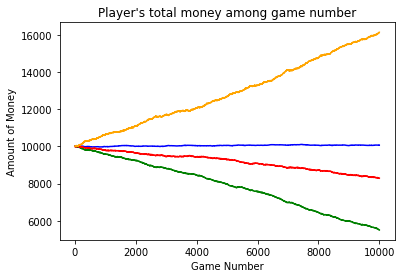

In [11]:
game_number = []
for i in range(10000):
    game_number.append(i)
plt.plot(game_number, game.randomMoney, color='g')
plt.plot(game_number, game.staticalMoney, color='b')
plt.plot(game_number, game.machineMoney, color='r')
plt.plot(game_number, game.dealerMoney, color='orange')
plt.xlabel('Game Number')
plt.ylabel('Amount of Money')
plt.title("Player's total money among game number")
plt.show()

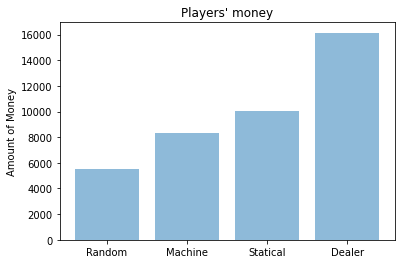

In [12]:
players = ('Random', 'Machine', 'Statical', 'Dealer')
y_pos = np.arange(len(players))
money = [game.randomMoney[-1],game.machineMoney[-1],game.staticalMoney[-1],game.dealerMoney[-1]]

plt.bar(y_pos, money, align='center', alpha=0.5)
plt.xticks(y_pos, players)
plt.ylabel('Amount of Money')
plt.title("Players' money")

plt.show()